#### Description

This code finds optimal num_parents for the GA_2_2 GeneticAlgorithm run method.

Rerunning with more run_per_expression and with target_expression = 1. In GA_Testing_2_2_parents_1, we see little variation for target_expression = 0.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_2_2 import GeneticAlgorithm

In [2]:
# Control variables
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
pop_size = 200
generations = 100
base_mutation_rate = 0.05
precision = 0.001

# Testing variables
run_per_experiment = 30
results = []
target_expression = 1
range_pop_parents = [True, False]

In [3]:
for pop_parents in range_pop_parents:
    for run_id in range(run_per_experiment):
        print(f'pop_parents: {pop_parents} | Run {run_id + 1} ', end='\r')

        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            max_length=max_length,
            pop_size=pop_size,
            generations=generations,
            base_mutation_rate=base_mutation_rate,
            precision=precision,
            chromosomes=1,
            islands=1,
            num_parents=2,
            gene_flow_rate=0,
            pop_parents=pop_parents, # Dependent variable
            print_progress=False,
            early_stopping=False
        )
        
        # Time the run
        start_time = time.time()
        best_sequence, best_prediction = ga.run()
        end_time = time.time()
        run_time = end_time - start_time
        
        # Record the results
        results.append({
            'pop_parents': pop_parents,
            'run_id': run_id + 1,
            'best_sequence': best_sequence,
            'error': abs(best_prediction - target_expression),
            'run_time': run_time
        })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


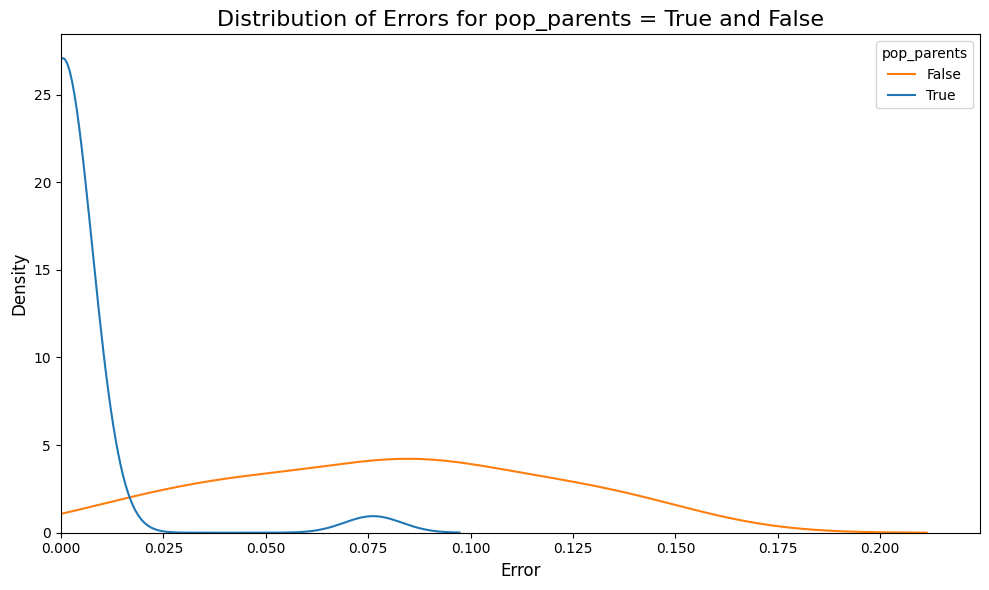

In [4]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df, x='error', hue='pop_parents', fill=False)

plt.title('Distribution of Errors for pop_parents = True and False', fontsize=16)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0)

plt.legend(title='pop_parents', labels=['False', 'True'])
plt.tight_layout()
plt.show()
